In [ ]:
%pip install langchain
%pip install langchain_community
%pip install beautifulsoup4
%pip install gpt4all
%pip install pandas
%pip install scikit-learn
%pip install numpy
%pip install matplotlib
%pip install chromadb
%pip install -U langchain langchain-core langchain-community langchain-ollama

In [ ]:
import langchain
from langchain.llms import Ollama
from langchain.document_loaders import WebBaseLoader, TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import GPT4AllEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain_ollama import OllamaLLM

# web_docs = [#     'https://www.kaggle.com/datasets/jovanliem/dataset-scraping-sendiri',
#     # 'https://en.wikipedia.org/wiki/Commonwealth_of_Nations',
#     ]
local_docs = './rag_dataset/gambling_detection_dataset.txt'
# loader = WebBaseLoader(web_docs)
loader = TextLoader(local_docs)
data = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100, 
    chunk_overlap=50,
    add_start_index=True
    )
all_splits = text_splitter.split_documents(data)

vector_store = Chroma.from_documents(documents=all_splits, embedding=GPT4AllEmbeddings()).as_retriever()
    
model_name = 'gemma3:4b'
ollama = OllamaLLM(base_url='http://localhost:11434', model=model_name)

qachain = RetrievalQA.from_chain_type(ollama, retriever=vector_store)


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
import pandas as pd

testing_data = pd.read_csv('../../Dataset/test.csv', sep=',')
X_test = testing_data['text']
y_test = testing_data['label']

In [ ]:
few_shot_examples = [
{"input":"Could you please clarify the terms outlined in section 3.2 of the contract?",
"output":"Certainly, I will provide clarification on the terms in section 3.2."},
{"input":"We are interested in extending the payment deadline to 30 days instead of the current 15 days. Additionally, we would like to add a clause regarding late payment penalties.",
"output":"Our request is to extend the payment deadline to 30 days and include a clause on late payment penalties."},
{"input":"""The current indemnification clause seems too broad. We would like to narrow it down to cover only direct damages and exclude consequential damages.
Additionally, we propose including a dispute resolution clause specifying arbitration as the preferred method of resolving disputes.""",
"output":"""We suggest revising the indemnification clause to limit it to covering direct damages and excluding consequential damages.
Furthermore, we recommend adding a dispute resolution clause that specifies arbitration as the preferred method of resolving disputes."""},
{"input":"I believe the proposed changes are acceptable.",
"output":"Thank you for your feedback. I will proceed with implementing the proposed changes."}
]

few_shot_template = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}")
    ]
)

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=few_shot_template,
    examples=few_shot_examples,
)

print(few_shot_prompt.format())

In [5]:
ollama.invoke("What is the capital of France?")#, temperature=0.9)


ConnectError: [WinError 10061] No connection could be made because the target machine actively refused it

In [ ]:
# ollama.invoke("What is the capital of France?", temperature=0.9)
import langchain
langchain.verbose = True

# query = f"Decide decisively which category the chat text: 'Judi Online Disebut Masuk Tahap Sosial, Cak Imin: 8,8 Juta Pasien Minta Direhabilitasi Jumat, 15 Nov' belongs to (0 or 1)! do not provide any explaination or reasoning! After printing result explain why you think the chat text belongs to the category you chose!"
query = """
    You are an ONLINE GAMBLING PROMOTION detection system classifying a live streaming comments between non online gambling prommotional comments and online gambling promotional comments.
    
    Example:
    ## Category: Not Online Gambling Promotion
    ## Text: KO SELASA SI BABG

    ## Category: Online Gambling Promotion
    ## Text: Udah sering banget maen diPASCOLHOKI, selalu puas! 😆 😂

    ## Category: Online Gambling Promotion
    ## Text: Keren maksimal! Menang banyak di AEЯO88,auto jadi sultan dadakan!  

    Now given this message, classify it as either '0' (Not Online Gambling Promotion) or '1' (Online Gambling Promotion)!
    """
    # Online Gambling Promotion (1)
ans = qachain({"query": query})

docs = vector_store.invoke(query)

# Print the retrieved context
print("Retrieved Context:")
for i, doc in enumerate(docs):
    print(f"Document {i+1}: {doc.page_content}\n")

print(ans['result'])

NameError: name 'qachain' is not defined

In [ ]:
# Only classification

ans_container=[]
for idx, test in enumerate(X_test):
    # query = f"Does chat text: '{test}' promote online gambling website (belongs to category 1)? decide and answer only yes or no with a confidence score!"
    query = f"Decide decisively which category the chat text: '{test}' belongs to (0 or 1)! do not provide any explaination or reasoning!"
    ans_container.append(qachain({"query": query}))
    print(idx+1, test, ans_container[idx]['result'])

    if idx == 3:
        break

1 beban 0
2 aing pernah main game menit langsung w uninstal 0
3 tiba tiba banget end 0
4 game ga sesuai tajuk kocak 1
5 pertama nih bang 0
6 bang popy playtime chapter bru 0
7 persiapan 0
8 jelek 1
9 chapter ter bikin perasaan campur aduk 1
10 daftar selamat datang situs slot online aman terpercaya bonafit mpoprofit rp game terpopuler tampilkan lainnya mahjong way pong pong mahjong mahjong princess mpoplay king arthur slot tampilkan lainnya casino tampilkan lainnya sydneypools kami hongkong kami amsterdam kami layanan member deposit waktu menit withdraw waktu menit sistem pembayaran online online online online online online online online download apk layanan member permainan terlengkap seluruh platform lisensi game layanan customer httpscuttlywhatsappmpoprofit provider berita promosi kontak persyaratan ketentuan faq umpan balik home apps masuk promosi live chat klik 1
11 epriting under kontrol 0
12 pertimbangkan menjelajahi dewdor menghargai pertumbuhan pribadi I don't know.
13 that ts

In [ ]:
Teks terdiri dari dua kategori, yaitu yang mempromosikan website judi online dan teks biasa atau netral & tidak promosi website judi online. Putuskan dengan tegas ke kategori mana kah teks chat streaming berikut: 'dewadratuh tempat paling oke buat maen recommend banget' (0 atau 1)! Jangan berikan penjelasan atau alasan apa pun! Hanyajawab dengan angka 0 atau 1!
Does chat text: 'dewadratuh tempat paling oke buat maen recommend banget' promote online gambling website (belongs to category 1)? decide and answer only yes or no with a confidence score!

In [6]:
# EXPLAINABLE AI (EXPLAIN AFTER DECIDING THE CLASS)

ans_container=[]
for idx, test in enumerate(X_test):
    # query = f"Does chat text: '{test}' promote online gambling website (belongs to category 1)? decide and answer only yes or no with a confidence score!"
    query = f"Decide decisively which category the chat text: '{test}' belongs to (0 or 1)! do not provide any explaination or reasoning! After printing result explain why you think the chat text belongs to the category you chose!"
    ans_container.append(qachain({"query": query}))
    print(ans_container[idx])

    if idx == 3:
        break


C:\Users\tyogo\AppData\Local\Temp\ipykernel_27484\517012848.py:7: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  ans_container.append(qachain({"query": query}))


{'query': "Decide decisively which category the chat text: 'beban' belongs to (0 or 1)! do not provide any explaination or reasoning! After printing result explain why you think the chat text belongs to the category you chose!", 'result': '0\n\nThe chat text "beban" (burden) relates to the promotional text ID: 1155 ("aero bikin lupa beban hiburan menyenangkan") which translates to "aero makes you forget the burden of enjoyable entertainment." This clearly falls under the category of *Not Online Gambling Promotion*.'}
{'query': "Decide decisively which category the chat text: 'aing pernah main game menit langsung w uninstal' belongs to (0 or 1)! do not provide any explaination or reasoning! After printing result explain why you think the chat text belongs to the category you chose!", 'result': '0\n\n**Reasoning:** The text "aing pernah main game menit langsung w uninstal" describes a negative experience with an online game ("aing pernah main game menit langsung w uninstal"). This aligns

In [73]:
import re

pattern = '^[0-9]+$'

y_pred = []
for idx, i in enumerate(ans_container):
    clean_res = re.sub(r"[^0-9]", "", i['result'])
    if clean_res != '0' and clean_res != '1':
        clean_res = '0'
    y_pred.append(int(clean_res))
    print(f"{clean_res} : {X_test[idx]}")

0 : beban
0 : aing pernah main game menit langsung w uninstal
0 : tiba tiba banget end
1 : game ga sesuai tajuk kocak
0 : pertama nih bang
0 : bang popy playtime chapter bru
0 : persiapan
1 : jelek
1 : chapter ter bikin perasaan campur aduk
1 : daftar selamat datang situs slot online aman terpercaya bonafit mpoprofit rp game terpopuler tampilkan lainnya mahjong way pong pong mahjong mahjong princess mpoplay king arthur slot tampilkan lainnya casino tampilkan lainnya sydneypools kami hongkong kami amsterdam kami layanan member deposit waktu menit withdraw waktu menit sistem pembayaran online online online online online online online online download apk layanan member permainan terlengkap seluruh platform lisensi game layanan customer httpscuttlywhatsappmpoprofit provider berita promosi kontak persyaratan ketentuan faq umpan balik home apps masuk promosi live chat klik
0 : epriting under kontrol
0 : pertimbangkan menjelajahi dewdor menghargai pertumbuhan pribadi
0 : that tsu tstrong v an

In [74]:
import csv

with open('rag_predicted.txt', 'w', newline='') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(y_pred)

Accuracy Score: 0.611764705882353
F1 Score: 0.44537815126050423
Recall Score: 0.34415584415584416
Classification Report: 
              precision    recall  f1-score   support

NotPromotion       0.83      0.61      0.70       256
   Promotion       0.34      0.63      0.45        84

    accuracy                           0.61       340
   macro avg       0.59      0.62      0.57       340
weighted avg       0.71      0.61      0.64       340

Confusion Matrix:



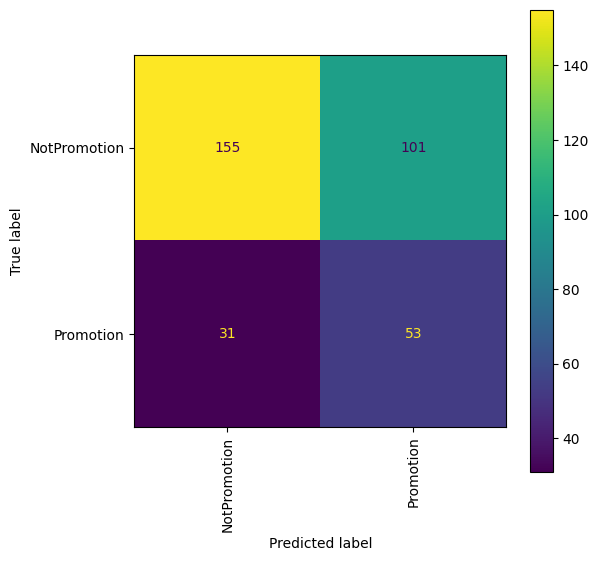

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
label_type = ['NotPromotion', 'Promotion']

print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")
print(f"F1 Score: {f1_score(y_pred, y_test)}")
print(f"Recall Score: {recall_score(y_pred, y_test)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, target_names=label_type)}")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels = label_type)

fig, ax = plt.subplots(figsize=(6,6))
print("Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')

In [38]:
data

[Document(metadata={'source': './rag_dataset/gambling_detection_dataset.txt'}, page_content='\n# ID: 1\n## Category: 1\n### Online Gambling Promotion\nmenang bayar\n\n---\n\n# ID: 2\n## Category: 1\n### Online Gambling Promotion\nkota bonus new member slot\n\n---\n\n# ID: 3\n## Category: 1\n### Online Gambling Promotion\nsaldo situs gacor\n\n---\n\n# ID: 4\n## Category: 1\n### Online Gambling Promotion\nbonus freespin buy spin\n\n---\n\n# ID: 5\n## Category: 1\n### Online Gambling Promotion\nevent parlay kalah menang\n\n---\n\n# ID: 6\n## Category: 1\n### Online Gambling Promotion\nprose deposit ovo gopay spay\n\n---\n\n# ID: 7\n## Category: 1\n### Online Gambling Promotion\nmain kalah uang\n\n---\n\n# ID: 8\n## Category: 1\n### Online Gambling Promotion\nmain gamble rasakan maxwin\n\n---\n\n# ID: 9\n## Category: 1\n### Online Gambling Promotion\nshare video slot jutaan rupiah\n\n---\n\n# ID: 10\n## Category: 1\n### Online Gambling Promotion\nminimal deposit rp\n\n---\n\n# ID: 11\n## C